# Task 3: Opposite-Measurement Entanglement

This notebook creates a quantum circuit where two qubits are entangled such that:
- Measuring one qubit always gives the opposite result of the other (e.g., if Qubit 0 is 0, Qubit 1 is 1, and vice versa).
- After 1000 shots, the histogram should show only '01' and '10', never '00' or '11'.

We’ll use:
- **H Gate**: Creates superposition.
- **X Gate**: Flips a qubit.
- **CX Gate**: Entangles qubits.

The target state is (|01⟩ + |10⟩)/√2.

In [1]:
# Import necessary libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 1: Initialize the Quantum Circuit

Create a circuit with:
- 2 qubits.
- 2 classical bits (to measure both qubits).

Both qubits start in |0⟩.

In [2]:
# Create a circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
print("Circuit created with 2 qubits and 2 classical bits.")

Circuit created with 2 qubits and 2 classical bits.


## Step 2: Create Superposition on Qubit 0

Apply the **Hadamard (H) gate** to Qubit 0:
- Transforms |0⟩ to |+⟩ = (|0⟩ + |1⟩)/√2.
- Qubit 0 is now in superposition.
- Qubit 1 stays |0⟩ for now.

In [3]:
# Apply H gate to Qubit 0
qc.h(0)
print("H gate applied to Qubit 0.")

H gate applied to Qubit 0.


## Step 3: Flip Qubit 1

Apply the **X gate** to Qubit 1:
- Flips |0⟩ to |1⟩.

Now:
- Qubit 0 is |+⟩ (superposition).
- Qubit 1 is |1⟩.

In [4]:
# Apply X gate to Qubit 1
qc.x(1)
print("X gate applied to Qubit 1.")

X gate applied to Qubit 1.


## Step 4: Entangle the Qubits

Apply the **Controlled-NOT (CX) gate**:
- Qubit 0 as control.
- Qubit 1 as target.
- If Qubit 0 is |1⟩, Qubit 1 flips; if Qubit 0 is |0⟩, Qubit 1 stays.

This creates (|01⟩ + |10⟩)/√2, where Qubit 0 and Qubit 1 are always opposite.

In [5]:
# Apply CX gate (Qubit 0 controls Qubit 1)
qc.cx(0, 1)
print("CX gate applied to entangle Qubit 0 and Qubit 1.")

CX gate applied to entangle Qubit 0 and Qubit 1.


## Step 5: Measure Both Qubits

Measure both qubits into classical bits:
- Qubit 0 → Classical bit 0.
- Qubit 1 → Classical bit 1.

We expect only '01' and '10' due to the anti-correlated entanglement.

In [6]:
# Measure both qubits
qc.measure([0, 1], [0, 1])
print("Measurement added for both qubits.")

Measurement added for both qubits.


## Step 6: Visualize the Circuit

Display the circuit to confirm:
- H on Qubit 0, X on Qubit 1, CX, and measurements.

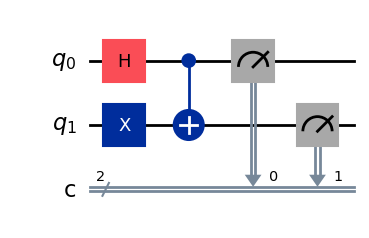

In [7]:
# Display the circuit diagram
circuit_diagram = qc.draw(output='mpl')
display(circuit_diagram)

## Step 7: Simulate the Circuit

Run the circuit 1000 times with **AerSimulator**:
- Counts should show only '01' and '10', each ~500 times.

In [8]:
# Simulate the circuit with 1000 shots
simulator = AerSimulator()
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
print("Simulation completed. Counts:", counts)

Simulation completed. Counts: {'10': 493, '01': 507}


## Step 8: Visualize the Results

Plot the histogram:
- Expect only '01' (Q0=0, Q1=1) and '10' (Q0=1, Q1=0), ~50/50.
- No '00' or '11', confirming opposite measurements.

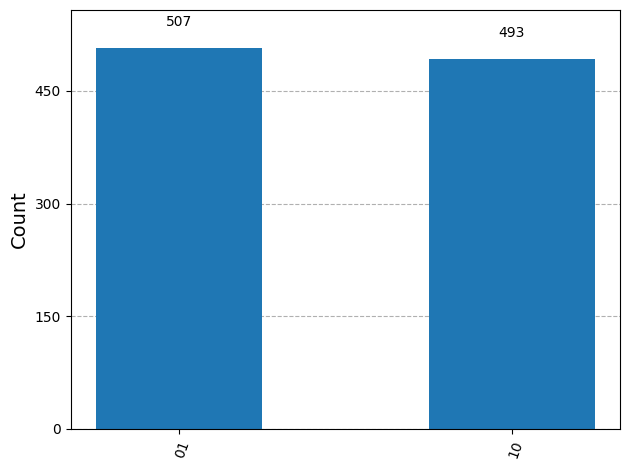

In [9]:
# Plot and display the histogram
fig = plot_histogram(counts)
display(fig)